In [52]:
import pint
u = pint.UnitRegistry()
import numpy as np
from scipy.optimize import fsolve,root
import matplotlib.pyplot as plt

In [5]:
_B = 0.1
_orificeDiam = 0.006 #* u.meter
P_1=24500000 #* u.pascal
P_2 = 4000000 #* u.pascal
MW = 0.03406 #* u.kg / u.mole
R = 8.3145 #* u.joule / u.kelvin / u.mole
y=1.4
A=np.pi / 4.0 * _orificeDiam**2
Cd = 0.61
T_1 = 295 #* u.kelvin
_R = R / MW
rho1= P_1/(_R*T_1)
m = 0.61*(1-(0.333+1.145*(_B**2+0.7*_B**5+ 12*_B**13))*(P_1-P_2)/(y*P_1))*A*(2*rho1*(P_1-P_2))**0.5
#print(m.to(u.kg/u.second))
print(m)

1.6176377200043894


In [11]:
_m = 0.8
def equation(P_2):
    return (Cd*(1-(0.333+1.145*(_B**2+0.7*_B**5+ 12*_B**13))*(P_1-P_2)/(y*P_1))*A*(2*rho1*(P_1-P_2))**0.5-_m)

_P_2= fsolve(equation, P_1-2000 , xtol=0.000001)

In [12]:
_P_2

array([21111354.47890796])

In [ ]:
P2 = np.linspace(22000000,24400000, 200)

In [17]:
(1.7*u.meter * (0.26 * u.meter)**2*np.pi/4.0).to(u.liters)

90.25795693763476 <Unit('liter')>

In [71]:
_orificeDiam = 0.006 #* u.meter
p1=24500000 #* u.pascal
MW = 0.03406 #* u.kg / u.mole
R = 8.3145 #* u.joule / u.kelvin / u.mole
y=1.4
A2=np.pi / 4.0 * _orificeDiam**2
Cd = 0.61
T1 = 295 #* u.kelvin
R = R / MW
gamma = y
mdot = 1.5 #*u.kg / u.second
def func(p2):
    val = mdot**2 - 2*A2**2*gamma/(gamma-1)*p1**2/R/T1*((p2/p1)**(2/gamma)-(p2/p1)**((gamma+1)/gamma))
    return val

res = root(func, 24000000)
print(res)
print(func(res['x']))

    fjac: array([[-1.]])
     fun: array([3.55271368e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.70201631e-11])
       r: array([-2.86530219e-07])
  status: 1
 success: True
       x: array([19080032.32784515])
[3.55271368e-15]


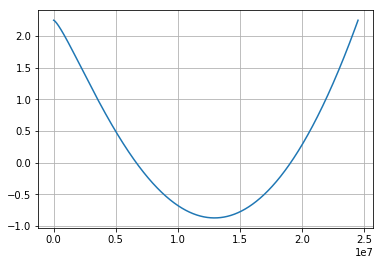

In [72]:
p2 = np.linspace(100,24500000,1000)
plt.plot(p2,func(p2))
plt.grid()
plt.show()

In [73]:
res = fsolve(func, 24000000)
print(res)
print(func(res[0]))

[19080032.32784515]
3.552713678800501e-15


In [87]:
gamma = 1.4 
def AAstar(M):
    val = A/Astar-1.0/M*((2.0/(gamma+1.0)*(1.0+(gamma-1.0)/2.0*M**2.0)))**((gamma+1.0)/(2.0*(gamma-1.0)))
    return val
    
_orificeDiam = 0.006
pipeDiam = 0.007
Astar = np.pi * _orificeDiam**2.0 /4.0
A = np.pi * pipeDiam**2.0 / 4.0

res = root(AAstar, 0.0001)
print(res)
print(A/Astar)

    fjac: array([[-1.]])
     fun: array([-2.22044605e-15])
 message: 'The solution converged.'
    nfev: 27
     qtf: array([8.92402596e-10])
       r: array([-2.01990523])
  status: 1
 success: True
       x: array([0.48918473])
1.3611111111111114


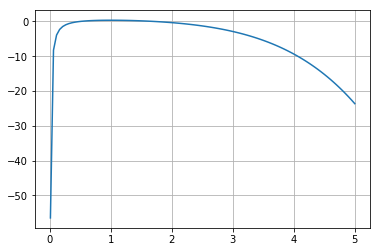

In [88]:
M = np.linspace(0.01,5,100)
plt.plot(M,AAstar(M))
plt.grid()
plt.show()